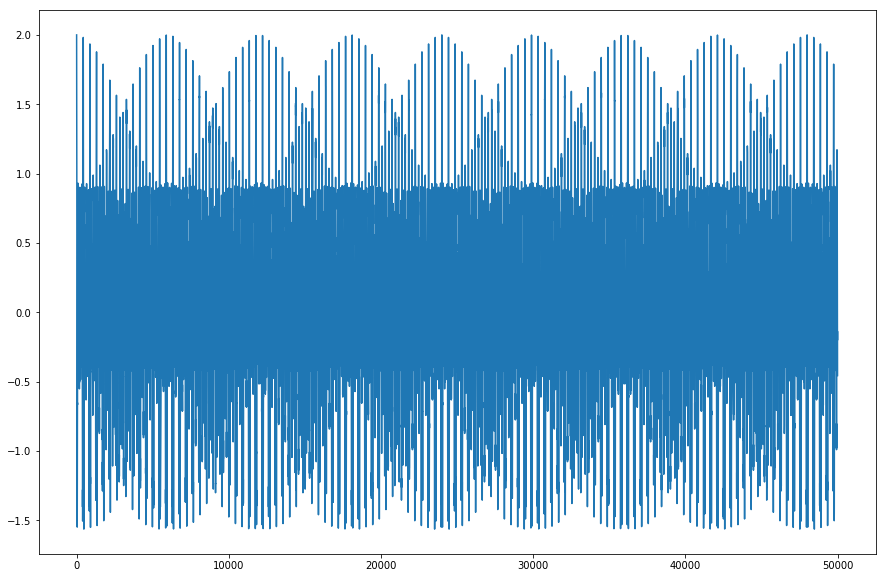

In [2]:
from scipy.fft import fft,ifft,fftfreq
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

A_0 = 0.6
A_1 = 0.55
A_2 = 0.55
A_3 = 0.15
A_4 = 0.1
A_5 = 0.05

F_s = 48000

n_max = 50000

#Criação do inal 
x = np.array(list(((A_0*np.cos(2*np.pi*440*n/F_s) + A_1*np.cos(2*np.pi*554*n/F_s) + A_2*np.cos(2*np.pi*660*n/F_s) + A_3*np.cos(2*np.pi*880*n/F_s) + A_4*np.cos(2*np.pi*4400*n/F_s) + A_5*np.cos(2*np.pi*8800*n/F_s)) for n in range(n_max))))
y = fft(x)

plt.figure(figsize=(15, 10))
plt.plot(x)
plt.show()



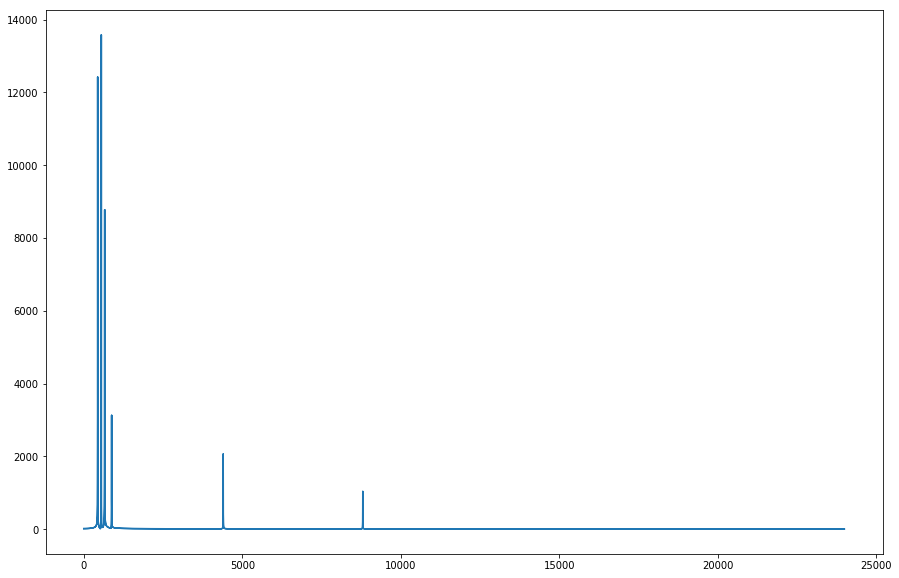

In [25]:

N = 600
# sample spacing
T = 1.0 / F_s
xf = np.abs(fftfreq(n_max, T))

plt.figure(figsize=(15, 10))
plt.plot(xf[:],np.abs(y[:])) #everything over 880 is (or should be) 0
plt.show()

In [26]:
xf.shape

(50000,)

We now convert these frequencies to the Bark scale for an easier masking model

$z_{bark} = 13 arctan(\frac{O.76f}{1000}) + 3.5 arctan(\frac{f}{7.5kHz})^2 $

In [27]:
z = list(13*np.arctan(0.76*f/1000) + 3.5*np.arctan((f/7500)**2) for f in xf)





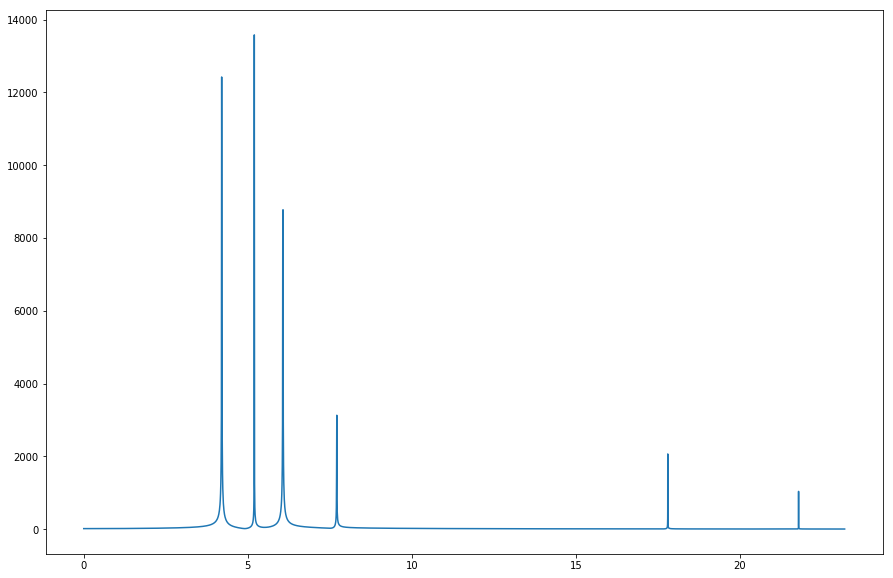

In [32]:
plt.figure(figsize=(15, 10))
plt.plot(z[:n_max//4],np.abs(y[:n_max//4])) #everything over 880 is (or should be) 0
plt.show()

Convert to SPL

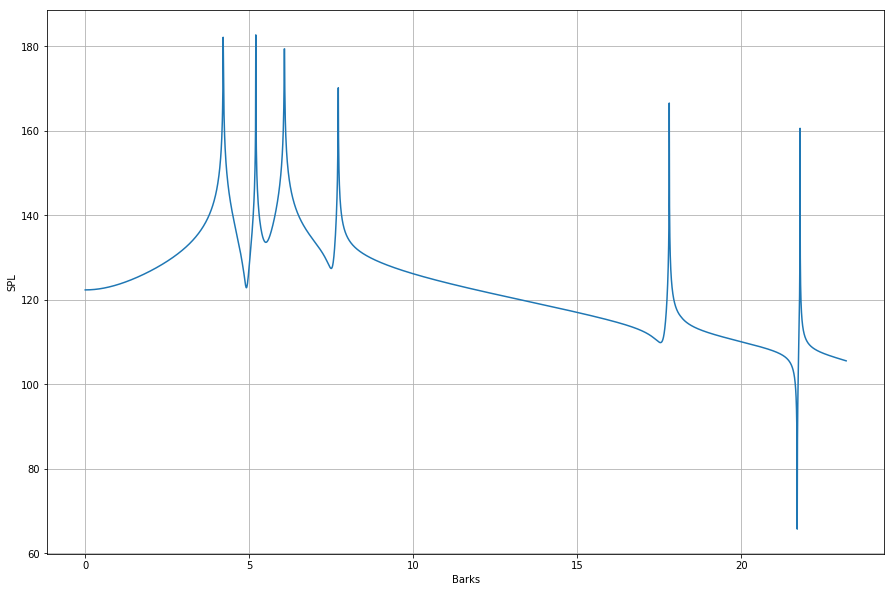

In [33]:
y_spl = list(10*np.log10(p**2/(0.00001**2)) for p in y)
plt.figure(figsize=(15, 10))
plt.plot(z[:n_max//4],np.abs(y_spl[:n_max//4])) #everything over 880 is (or should be) 0
plt.xlabel("Barks")
plt.ylabel("SPL")
plt.grid()
plt.show()

In [34]:
peaks,_ = find_peaks(np.abs(y_spl[:n_max//4]),distance = 50)


[ 458  577  688  917 4583 9167]


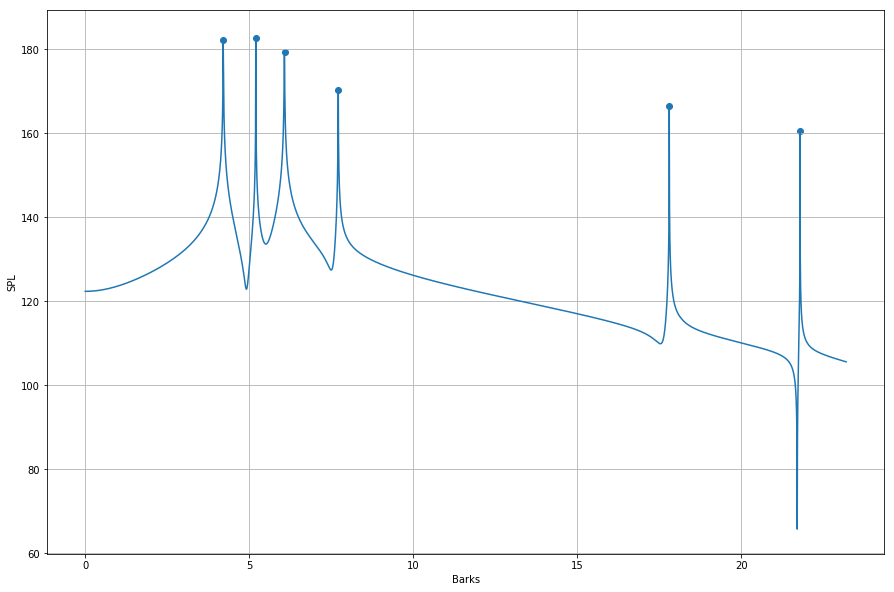

In [35]:
down_shift = 14.5 #taken from page 191 tone masking noise

plt.figure(figsize=(15, 10))
plt.plot(z[:n_max//4],np.abs(y_spl[:n_max//4])) #select only first sample for better visualization
print(peaks)
peaks = np.array(peaks)
y_spl=np.array(y_spl)
z = np.array(z)
plt.scatter(z[peaks], np.array([(i) for i in np.abs(y_spl[peaks])]))
plt.xlabel("Barks")
plt.ylabel("SPL")
plt.grid()
plt.show()


In [36]:
def masker(Lm, dz):
    #taken from page 185
    #note that this actually returns 10log10 of F
    F = (-27 + (0.37*np.max(int(Lm - 40),int(0))*np.heaviside(dz,1)))*np.abs(dz)+Lm
    return F
    return F

In [37]:
maskers = np.zeros([peaks.shape[0],z.shape[0]]) 
for i,peak in enumerate(peaks):
    maskers[i,:]= masker(np.abs(y_spl[peak])-17,(z - z[peak]))
    
    

[ 458  577  688  917 4583 9167]


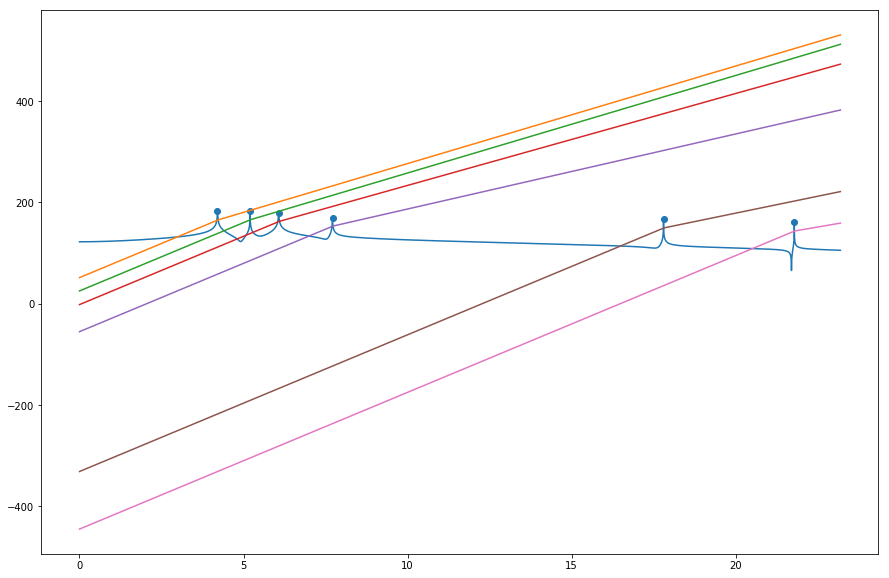

In [38]:
down_shift = 14.5 #taken from page 191 tone masking noise
y_spl = list(10*np.log10(p**2/0.00001**2) for p in y)
plt.figure(figsize=(15, 10))
plt.plot(z[:n_max//4],np.abs(y_spl[:n_max//4]))
print(peaks)
peaks = np.array(peaks)
y_spl=np.array(y_spl)
z = np.array(z)
plt.scatter(z[peaks], np.abs(y_spl[peaks]))
for i in range(maskers.shape[0]):
    plt.plot(z[:n_max//4],maskers[i,:n_max//4]) 
plt.show()

In [24]:
#Deu errado, ainda estamos em busca do problema